In [27]:
# Analysis for Japan

# Install and import the appropriate libraries and dependencies.
%pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from prophet import Prophet
%matplotlib inline

In [29]:
#create reference for CSV file
japan_csv = "Resources/athlete_events.csv"

In [30]:
#read CSV file into a dataframe
japan_df = pd.read_csv(japan_csv)
japan_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [34]:
#create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
filtered_japan_df = japan_df[['Team', 'Games', 'Year', 'Season', 'Sport', 'Event', 'Medal', 'City']]
filtered_japan_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
4,Netherlands,1988 Winter,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN,Calgary


In [36]:
#filter the dataframe to only include Japan and Season is summer and city is Tokyo and year is 2021
filtered_japan_df = filtered_japan_df[(filtered_japan_df['Year'] == 2021)]
filtered_japan_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City


In [39]:
#filter the dataframe to only include Japan and Season is summer and city is Tokyo and year is 1964
japan_summer_1964_df = japan_df[(japan_df['Year'] == 1964)]
japan_summer_1964_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
85,24,Nils Egil Aaness,M,27.0,NaN,NaN,Norway,NOR,1964 Winter,1964,Winter,Innsbruck,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
192,87,Rost'om Omeris dze Abashidze,M,29.0,188.0,97.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
234,112,Aziz Abbas,M,21.0,169.0,67.0,Iraq,IRQ,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Lightweight,NaN
239,116,Hosni Mohamed Abbas,M,32.0,NaN,60.0,Egypt,EGY,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Featherweight,NaN
265,137,Giordano Giulio Abbondati,M,15.0,175.0,64.0,Italy,ITA,1964 Winter,1964,Winter,Innsbruck,Figure Skating,Figure Skating Men's Singles,NaN


In [42]:
# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
japan_summer_1964_df['Gold_Medals'] = np.where(japan_summer_1964_df['Medal'] == 'Gold', 1, 0)   
japan_summer_1964_df['Silver_Medals'] = np.where(japan_summer_1964_df['Medal'] == 'Silver', 1, 0)   
japan_summer_1964_df['Bronze_Medals'] = np.where(japan_summer_1964_df['Medal'] == 'Bronze', 1, 0)

C:\Users\brand\AppData\Local\Temp\ipykernel_75672\3436174012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_summer_1964_df['Gold_Medals'] = np.where(japan_summer_1964_df['Medal'] == 'Gold', 1, 0)
C:\Users\brand\AppData\Local\Temp\ipykernel_75672\3436174012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_summer_1964_df['Silver_Medals'] = np.where(japan_summer_1964_df['Medal'] == 'Silver', 1, 0)
C:\Users\brand\AppData\Local\Temp\ipykernel_75672\3436174012.py:4: SettingWithCopyWarning: 
A 

<Axes: >

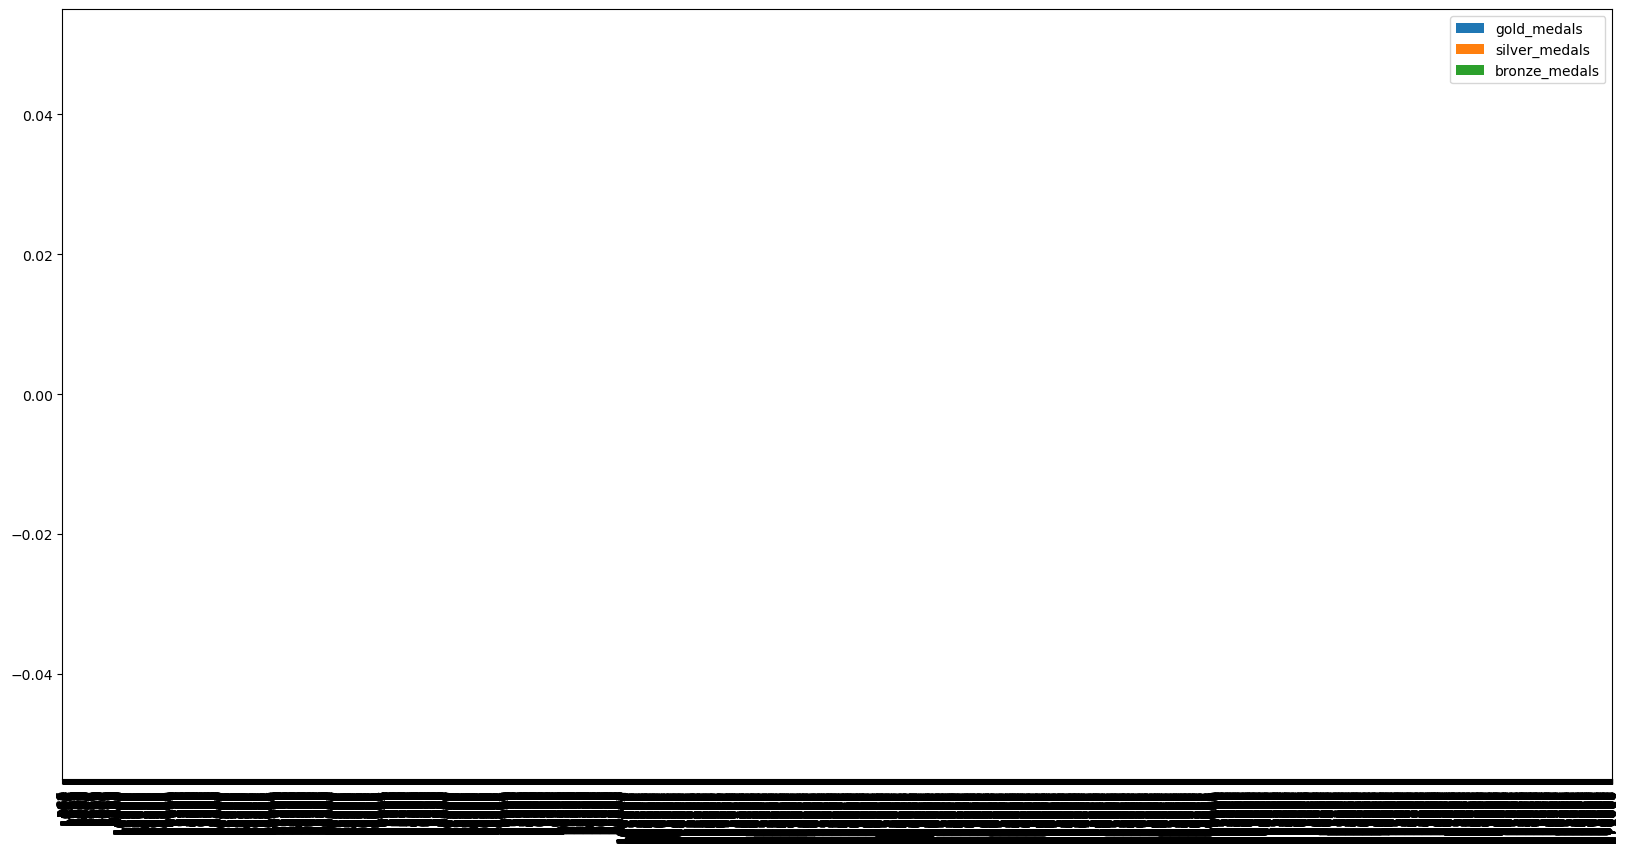

In [44]:
# Plot the gold_medals, silver_medals, bronze_medals and non_medal_participations for the Japanese team in the Summer Olympics.
# Use a stacked bar chart, where the total size of the bar is the total_participations

import matplotlib.pyplot as plt
japan_summer_1964_df[['gold_medals', 'silver_medals', 'bronze_medals']].plot(kind='bar', stacked=True, figsize=(20, 10))